# **Tarea 1**

El problema de los multi-armed bandits es una simplificación clave dentro del campo del aprendizaje por refuerzo (Reinforcement Learning), que permite explorar conceptos fundamentales como el balance entre exploración y explotación. Su nombre proviene de la analogía con las máquinas tragamonedas (slot machines), donde cada brazo representa una acción con una distribución de recompensas desconocida. El objetivo es maximizar la recompensa acumulada a través de iteraciones, aprendiendo qué acción es la más óptima.

A diferencia del aprendizaje supervisado, el aprendizaje por refuerzo depende de feedback evaluativo, que no proporciona directamente la mejor acción a tomar, sino una evaluación de las acciones realizadas. Esto contrasta con el feedback instructivo, utilizado en tareas supervisadas, donde se indica la acción correcta independientemente de lo que el agente haya elegido.

Este aspecto evaluativo introduce la necesidad de:

1. Exploración: Probar acciones nuevas para descubrir recompensas potenciales.
2. Explotación: Seleccionar acciones previamente evaluadas como óptimas para maximizar la recompensa acumulada.

El problema de los multi-armed bandits aborda esta tensión en su forma más elemental, evitando la complejidad asociativa y sin incluir múltiples estados en el entorno.

## _Punto 1:_

Para el problema de multi-armed bandit, implemente un banco de pruebas (testbed) similar al considerado en clase y en el libro de texto, pero con 15 acciones con 𝑞∗(𝑎𝑘) generadas aleatoriamente de acuerdo a una distribución normal con media 10 y varianza 4, y cada acción con varianza de 2.
Resuelva el problema de maximizar la suma de recompensas en un horizonte de tiempo de 5000 iteraciones con los siguientes algoritmos (implementados por usted):

- ϵ-greedy con recompensa promedio.
- Gradient Bandit.

    Para cada caso ajuste apropiadamente los parámetros requeridos (𝛼,𝜖), y grafique el desempeño de los algoritmos en términos de recompensa recibida y porcentaje de iteraciones en que se selecciona la acción óptima.

### Implementación - ϵ-greedy

Se realzia la importación de las librerías requeridas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

El enunciado del problema, da los siguientes valores para la parametrización del problema:

In [ ]:
k = 15 # Número de acciones
promedio = 10 # promedio q*(ak)
varianza_r = 4 # varainza q*(ak)
var_recompensa = 2 # varianza de las recompensas
iteraciones = 5000 # numero de iteraciones
num_experimentos = 1000 # número de experimentos

Se define la función que gener valores de q*(ak), esta función genera los valores verdaderos 𝑞∗(𝑎) de cada una de las 𝑘 acciones en el problema de multi-armed bandit. Los valores se generan a partir de una distribución normal. Devolviendo un array de tamaño 𝑘 con los valores 𝑞∗(𝑎).

Esta función simula las recompensas esperadas de cada acción, es decir, el "valor real" de cada brazo en el multi-armed bandit. Cada ejecución de la función genera un conjunto diferente de valores 𝑞∗(𝑎), lo que simula distintos entornos de prueba para el aprendizaje del agente.

In [3]:
def valores_verdaderos_q():
  return np.random.normal(promedio, np.sqrt(varianza_r), k)

Se define una función para actualizar los valores de q_*(a) para simular un entorno no estacionario. Esta función actualiza los valores verdaderos 𝑞∗(𝑎)de cada acción, agregando una pequeña cantidad de ruido gaussiano en cada iteración. Esto se hace para simular un entorno no estacionario, donde los valores óptimos de las acciones cambian con el tiempo.

In [4]:
def actualizar_q(q_verdaderos):
    ruido = np.random.normal(0, 0.01, k)  # Simulando pequeñas variaciones
    return q_verdaderos + ruido

Se define la función que genera valores de recompensa para el testbed. Esta función genera la recompensa que recibe el agente al seleccionar una acción en el multi-armed bandit. La recompensa se obtiene a partir de una distribución normal, con una media basada en el valor verdadero 𝑞∗(𝑎) de la acción tomada y la varianza definida en cada caso.

In [5]:
def valores_recompensa(q_valores_verdaderos, accion_tomada):
  return np.random.normal(q_valores_verdaderos[accion_tomada], np.sqrt(var_recompensa))

Se realiza la implementación del algoritmo epsilon-greedy, donde con probabilidad ε, se elige una acción aleatoria (exploración), y con probabilidad 1 - ε, se elige la acción con el mayor valor estimado (explotación).

In [ ]:
def epsilon_greedy(epsilon, alpha):
    # Inicialización
    recompensa_promedio = np.zeros(iteraciones) # Guarda la recompensa promedio en cada iteración.
    accion_optima_recuento = np.zeros(iteraciones) # Guarda el número de veces que se elige la acción óptima.

    # Se generan los valores verdaderos 𝑞∗(𝑎) de las 15 acciones
    for _ in range(num_experimentos):
        q_valores_verdaderos = valores_verdaderos_q()
        q_estimado = np.zeros(k)
        accion_optima = np.argmax(q_valores_verdaderos)
        
        for t in range(iteraciones):
            # Selección de acción
            if np.random.rand() < epsilon:
                accion = np.random.choice(k)  # Exploración: se elige una acción al azar
            else:
                accion = np.argmax(q_estimado)  # Explotación: se elige la mejor acción conocida

            # Generar recompensa y actualizar estimado
            recompensa = valores_recompensa(q_valores_verdaderos, accion)
            q_estimado[accion] += alpha * (recompensa - q_estimado[accion])

            # Actualizar recompensas promedio
            recompensa_promedio[t] += recompensa
            if accion == accion_optima:
                accion_optima_recuento[t] += 1

            # Actualizar valores verdaderos para el caso no estacionario
            q_valores_verdaderos = actualizar_q(q_valores_verdaderos)
            accion_optima = np.argmax(q_valores_verdaderos)

    # Se calcula el promedio de recompensas y porcentaje de selección de la acción óptima tras ejecutar 1000 experimentos.
    recompensa_promedio /= num_experimentos
    accion_optima_recuento /= num_experimentos

    return recompensa_promedio, accion_optima_recuento

Se definen valores de alpha y epsilon para contrastar en el testbed

In [8]:
alphas = [0.1, 0.2, 0.5]  # Diferentes tasas de aprendizaje
epsilons = [0, 0.1, 0.05, 0.01] # en esta parte se pueden cambiar los valores de epsilon

Se ejecutan los experimentos para cada valor de alpha y epsilon, luego se almacenan los resultados. Esta función ejecuta el algoritmo ε-greedy para todas las combinaciones posibles de los valores de 𝛼 (tasa de aprendizaje) y 𝜖 (tasa de exploración), almacenando los resultados en un diccionario.

In [ ]:
def obtener_resultados(alphas, epsilons):
    res = {}
    for alpha in alphas:
        for epsilon in epsilons:
            key = (alpha, epsilon)  # Se crea una clave única para cada combinación de parámetros 𝛼 y 𝜖
            res[key] = epsilon_greedy(epsilon, alpha)  # Genera resultados para cada combinación
    return res

resultados = obtener_resultados(alphas, epsilons)

Se realizán las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones

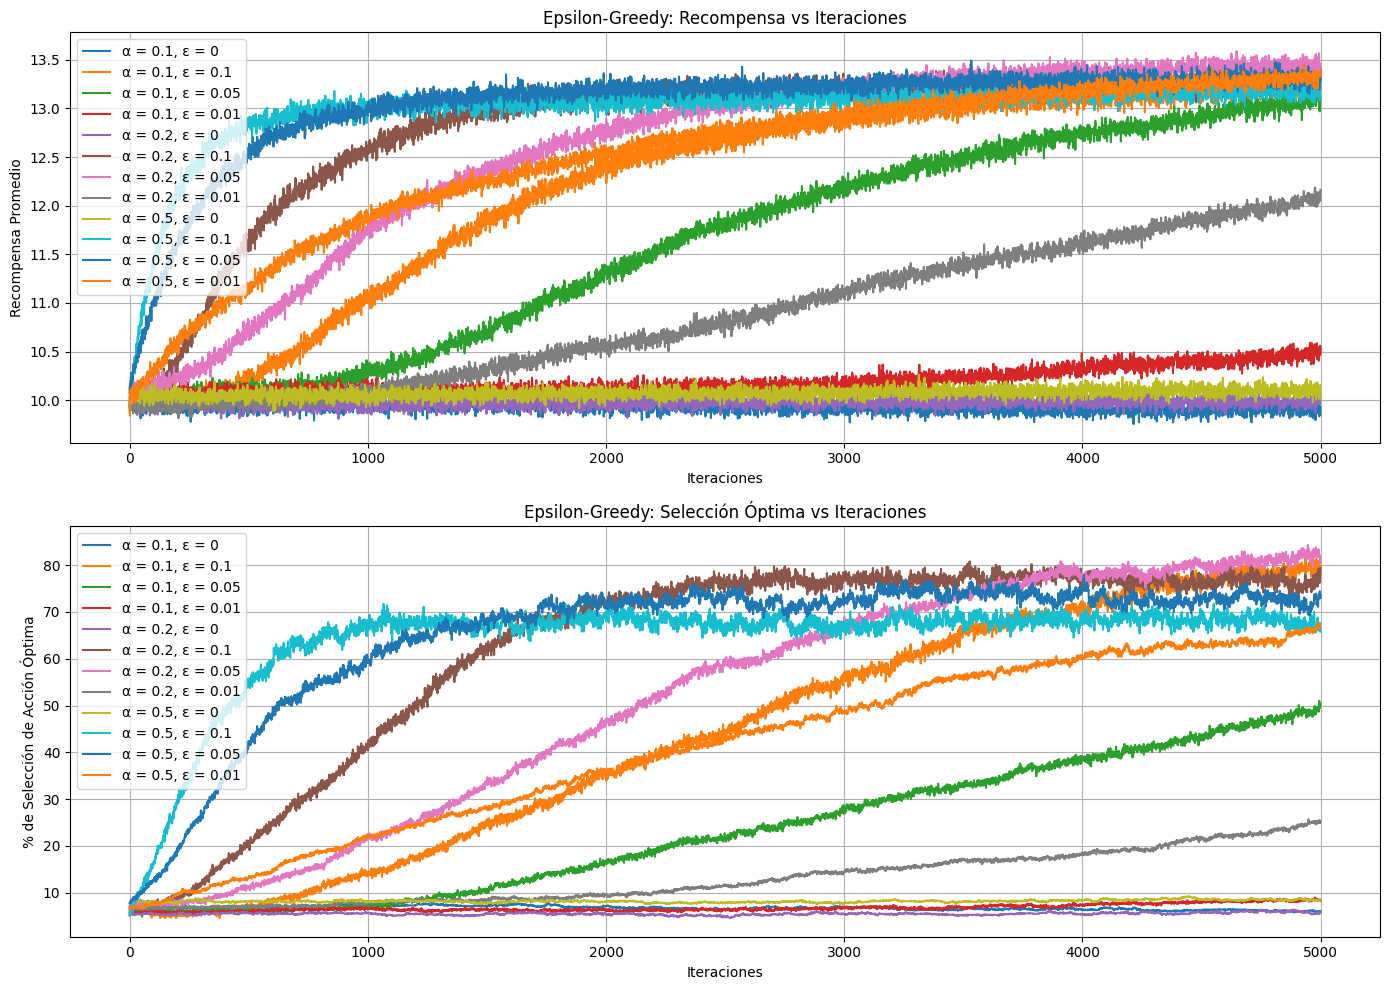

In [10]:
plt.figure(figsize=(14, 10))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for (alpha, epsilon), (recompensa, _) in resultados.items():
    plt.plot(recompensa, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for (alpha, epsilon), (_, porcentaje_optimo) in resultados.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

### Implementación - Gradient Bandit

El algoritmo Gradient Bandit es un método basado en ascenso de gradiente estocástico para resolver problemas de multi-armed bandits, el cual no usa estimaciones directas de valores de acción como ε-greedy, sino que mantiene una preferencia relativa 𝐻𝑡(𝑎) para cada acción, actualizándola en función de las recompensas obtenidas. La selección de acciones se realiza mediante una distribución softmax, donde la probabilidad de elegir una acción está determinada por la función exponencial de sus preferencias relativas. Tras recibir una recompensa 𝑅𝑡, las preferencias se ajustan de manera que aumentan para acciones seleccionadas con recompensas superiores al baseline y disminuyen para las demás, ayudando a estabilizar el aprendizaje y mejorar la convergencia. El uso del baseline, que es el promedio de recompensas obtenidas hasta el tiempo 𝑡, reduce la varianza y permite que el algoritmo aprenda de manera más eficiente.

Se importan las librerías requeridas

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Se declaran las variables contempladas para el problema

In [12]:
k = 15  # Número de acciones
media_q = 10  # Media de q_*(a_k)
varianza_q = 4  # Varianza de q_*(a_k)
varianza_recompensa = 2  # Varianza de las recompensas
iteraciones = 5000  # Número de iteraciones
repeticiones = 1000  # Número de experimentos

Se define una función para generar valores verdaderos q_*(a_k)

In [13]:
def generar_valores_q():
    return np.random.normal(media_q, np.sqrt(varianza_q), k)

Se define una función para generar recompensa para una acción

In [14]:
def generar_recompensa(q_verdadero, accion):
    return np.random.normal(q_verdadero[accion], np.sqrt(varianza_recompensa))

Se define una función para la implementación del algoritmo Gradient Bandit

In [15]:
def gradient_bandit(alpha):
    recompensa_promedio = np.zeros(iteraciones)
    accion_optima_recuento = np.zeros(iteraciones)

    for _ in range(repeticiones):
        q_verdadero = generar_valores_q()  # Generar nuevo testbed
        accion_optima = np.argmax(q_verdadero)
        H = np.zeros(k)  # Preferencias iniciales
        pi = np.ones(k) / k  # Probabilidades iniciales (uniformes)
        baseline = 0  # Valor inicial de la línea base

        for t in range(iteraciones):
            # Seleccionar acción basada en softmax
            accion = np.random.choice(np.arange(k), p=pi)
            
            # Generar recompensa para la acción seleccionada
            recompensa = generar_recompensa(q_verdadero, accion)
            
            # Actualizar línea base
            baseline += (recompensa - baseline) / (t + 1)
            
            # Actualizar preferencias
            for a in range(k):
                if a == accion:
                    H[a] += alpha * (recompensa - baseline) * (1 - pi[a])
                else:
                    H[a] -= alpha * (recompensa - baseline) * pi[a]
            
            # Actualizar probabilidades usando softmax
            exp_H = np.exp(H)
            pi = exp_H / np.sum(exp_H)
            
            # Registrar resultados
            recompensa_promedio[t] += recompensa
            if accion == accion_optima:
                accion_optima_recuento[t] += 1

    recompensa_promedio /= repeticiones
    accion_optima_recuento /= repeticiones
    return recompensa_promedio, accion_optima_recuento

Se definen valores de alpha y epsilon para contrastar en el testbed

In [16]:
alphasBandits = [0.1, 0.4]

Se define una función para ejecutar el algoritmo Gradient Bandit en relación a los valores de alphaa definidos

In [17]:
def obtener_resultados_gradient_bandit(alphas):
    resultados = {}
    for alpha in alphas:
        resultados[alpha] = gradient_bandit(alpha)
    return resultados

resultados_gradient = obtener_resultados_gradient_bandit(alphasBandits)

Se realizán las graficas del testbed para contrastar los resultados de recompensa promedio y selección de acción optima durante las iteraciones

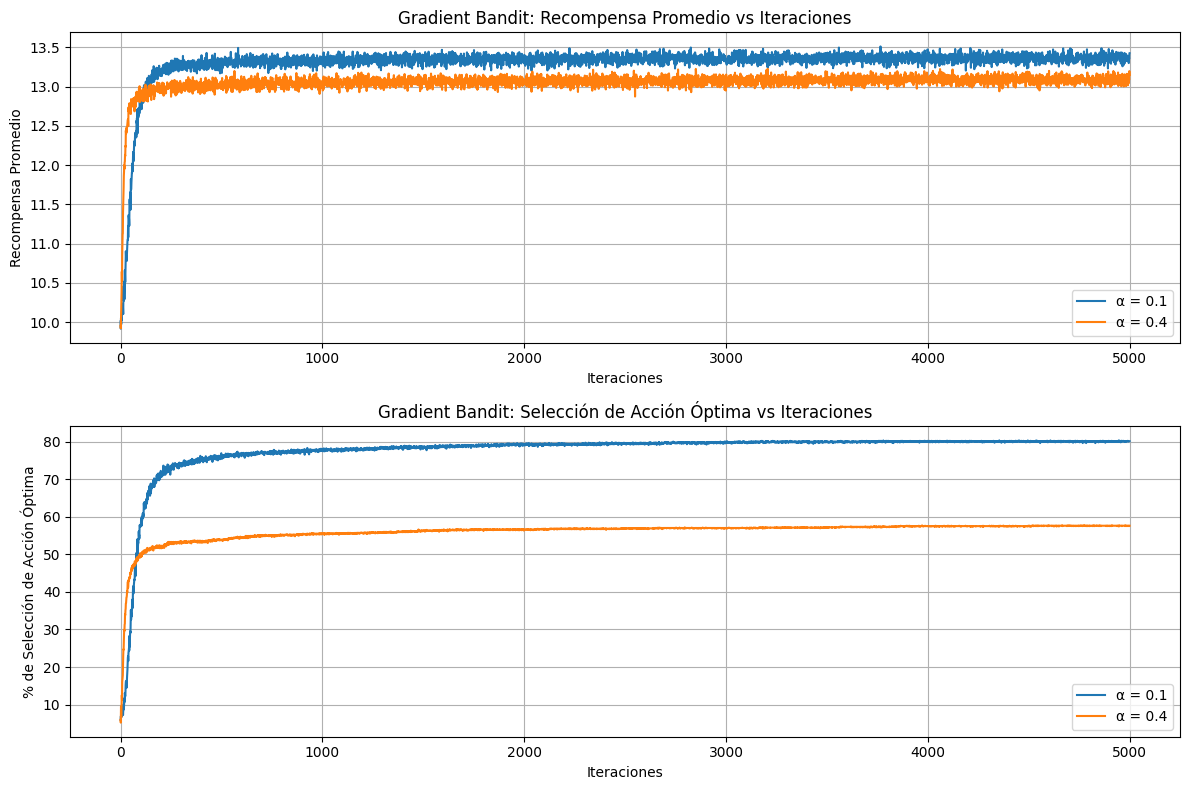

In [18]:
plt.figure(figsize=(12, 8))

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for alpha, (recompensa, _) in resultados_gradient.items():
    plt.plot(recompensa, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Gradient Bandit: Recompensa Promedio vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for alpha, (_, porcentaje_optimo) in resultados_gradient.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Gradient Bandit: Selección de Acción Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

## _Punto 2:_

### Implementación - ϵ-greedy

El enunciado del problema, da los siguientes valores para la parametrización del problema:

In [19]:
var_recompensa = 4 # varianza de las recompensas

Se ejecutan los experimentos para cada valor de epsilon y almacenar resultados

In [20]:
resultados2 = obtener_resultados(alphas, epsilons)

Se realizán las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones

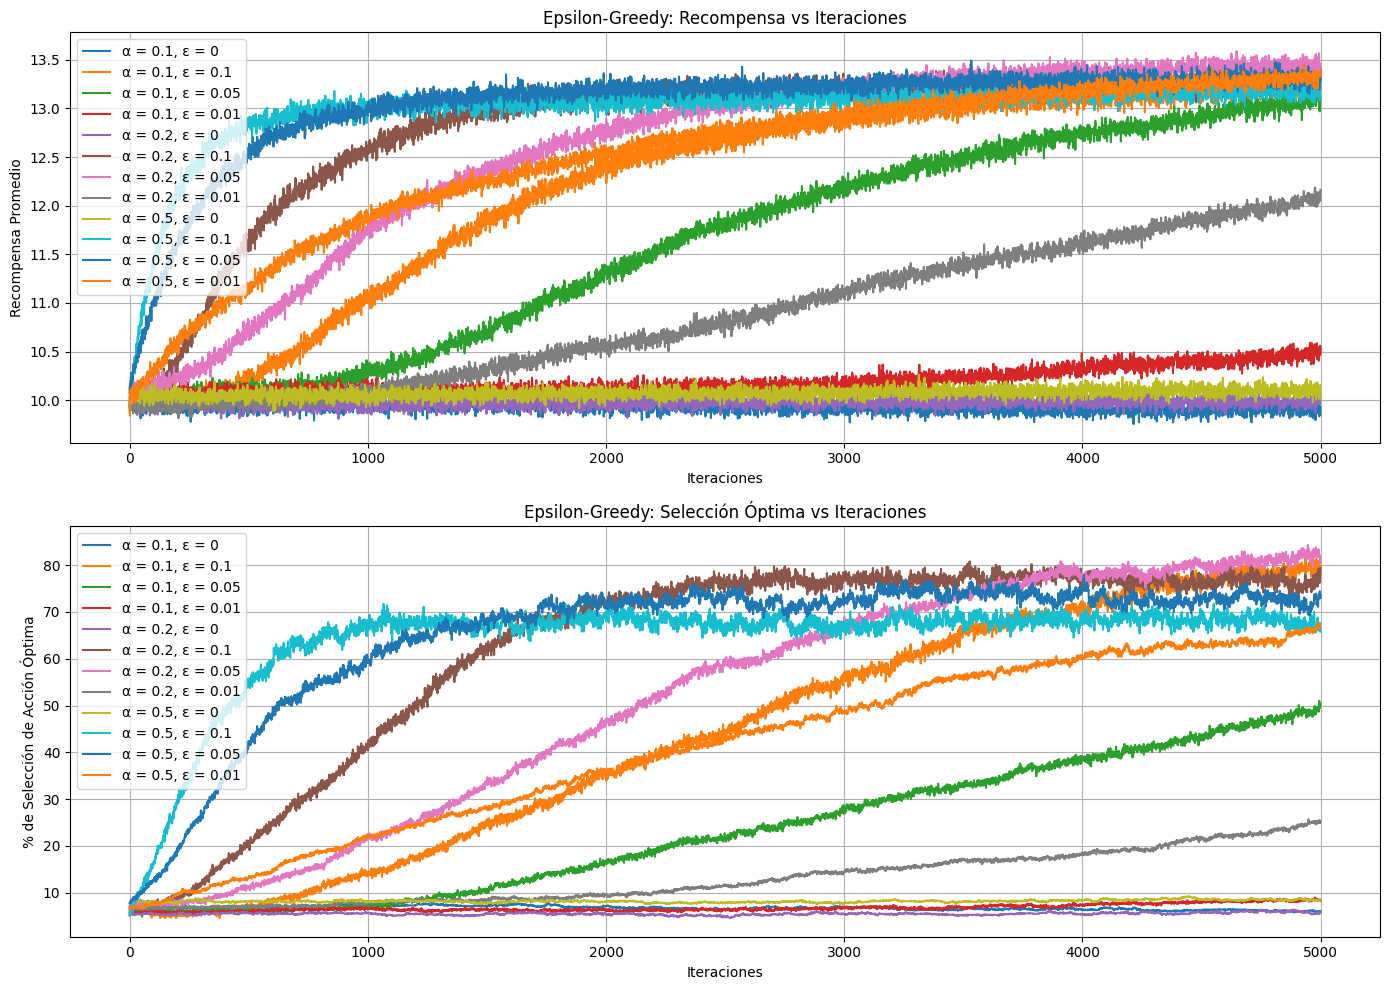

In [21]:
plt.figure(figsize=(14, 10))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for (alpha, epsilon), (recompensa, _) in resultados.items():
    plt.plot(recompensa, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for (alpha, epsilon), (_, porcentaje_optimo) in resultados.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

Para contrastar los resultados, entre los datos obtenidos en el punto 1 y el punto 2 con ϵ-greedy, se tiene:

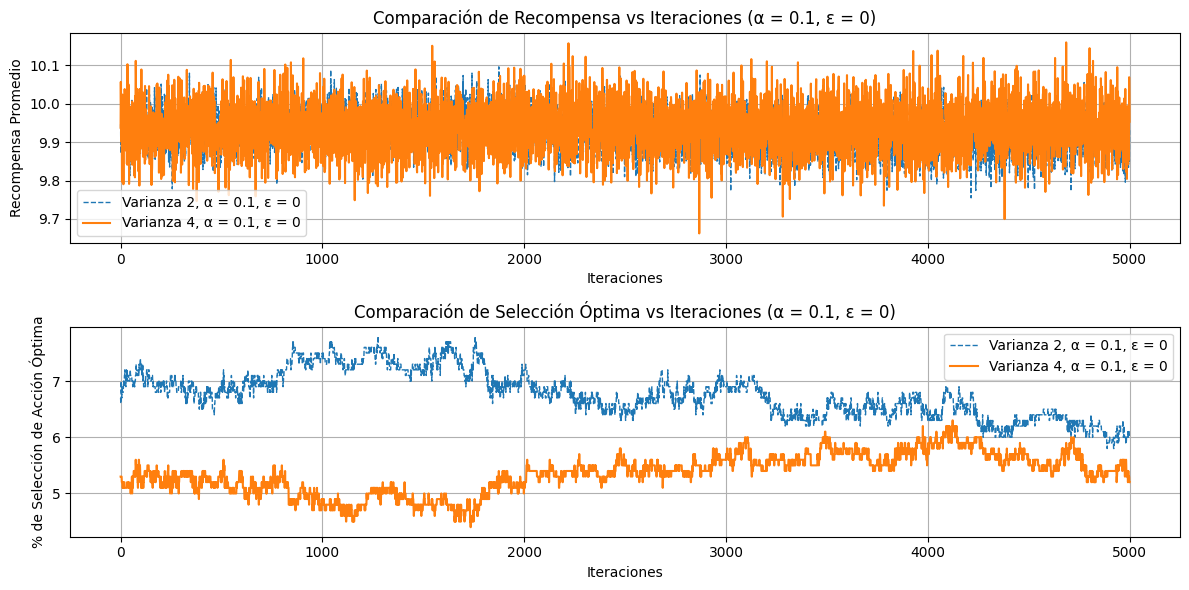

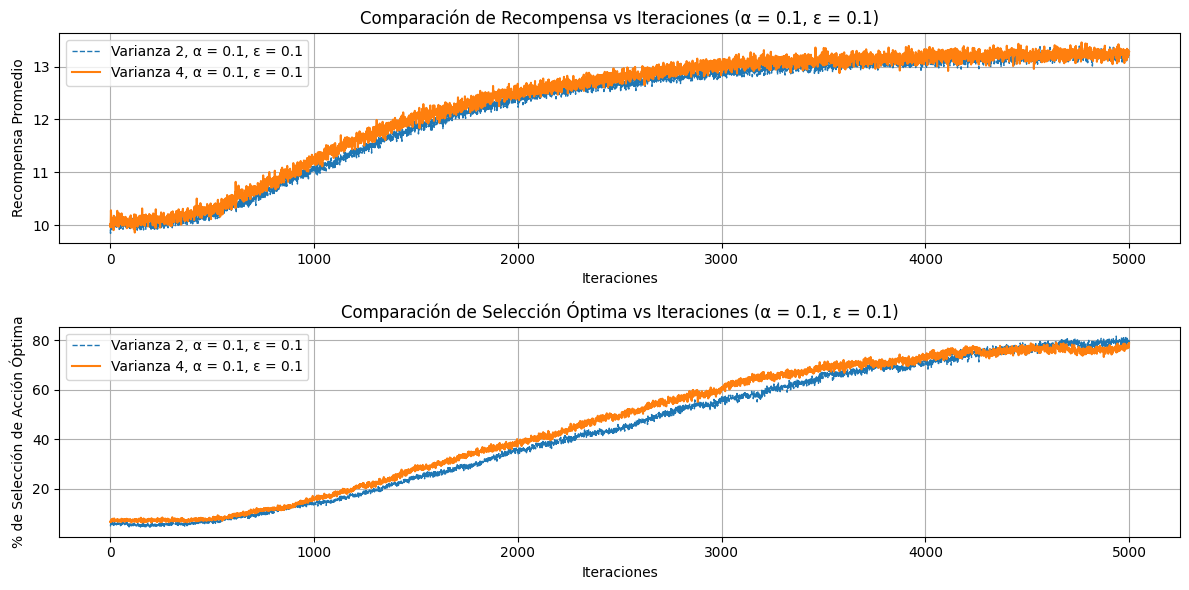

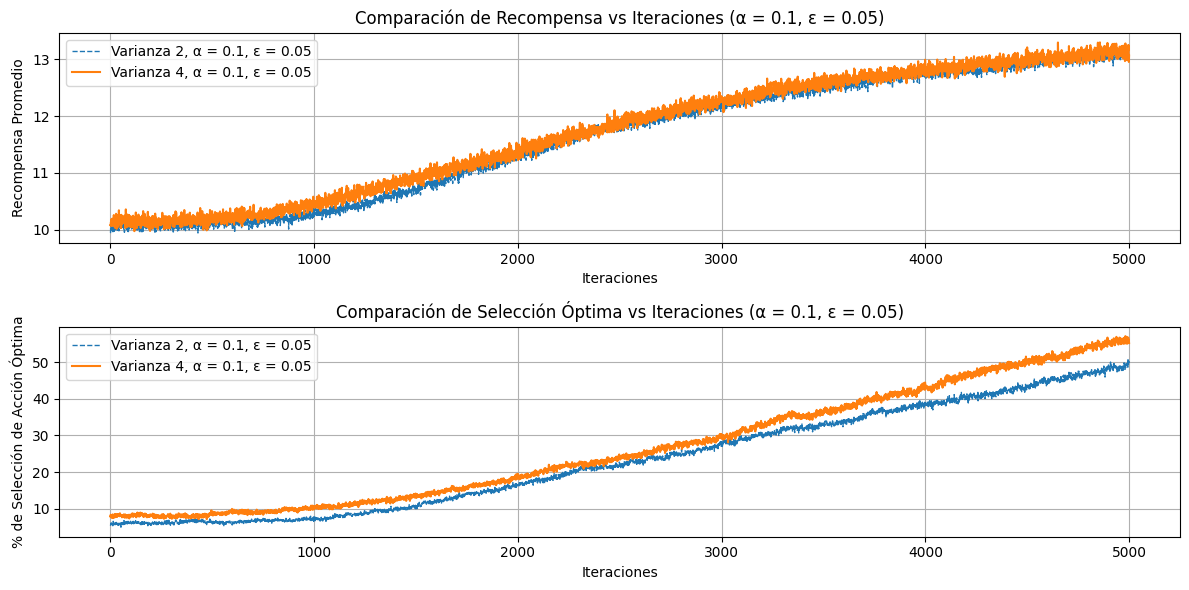

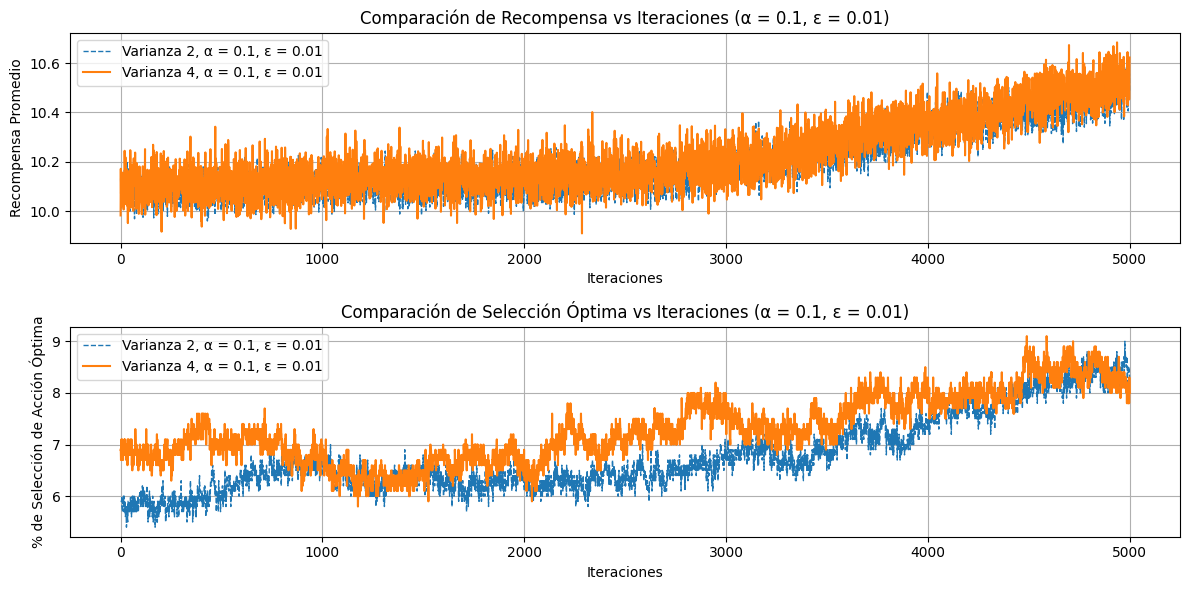

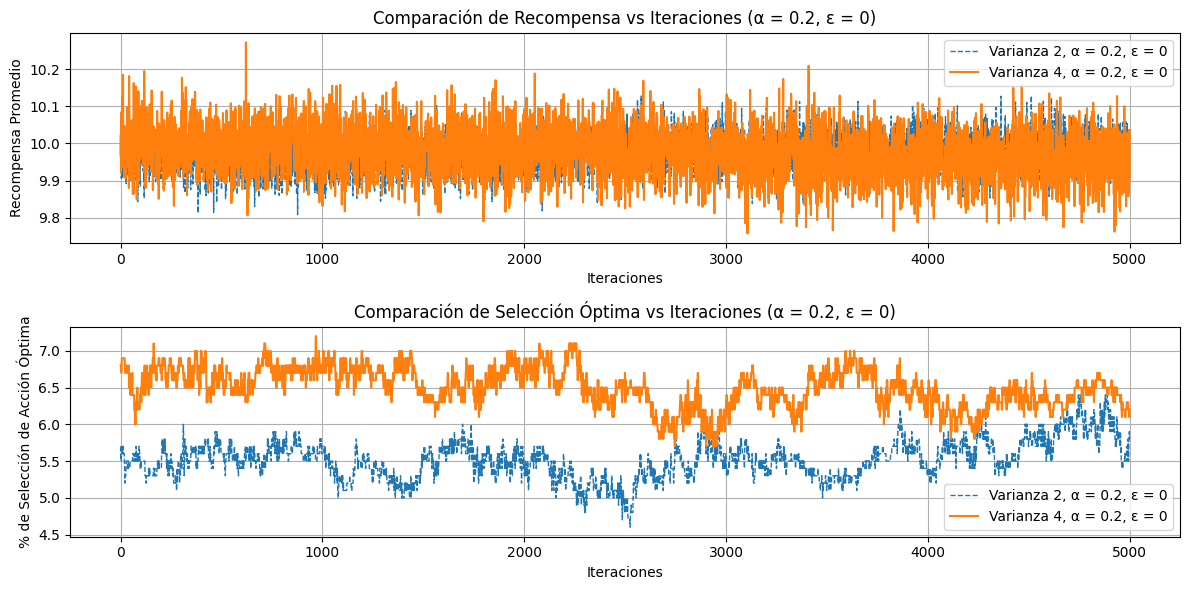

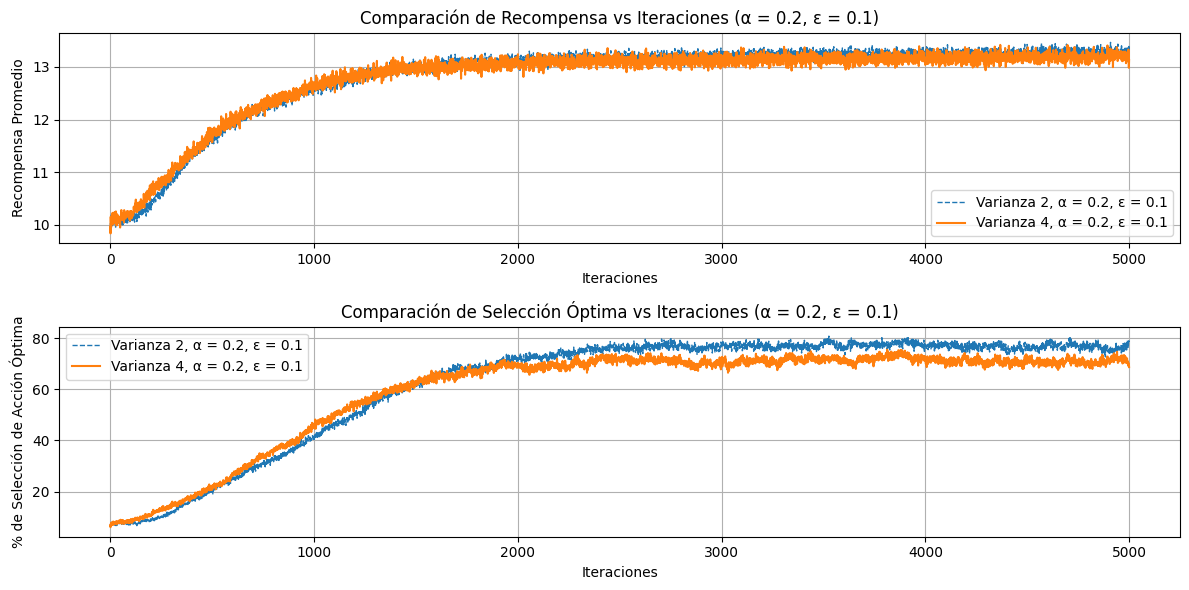

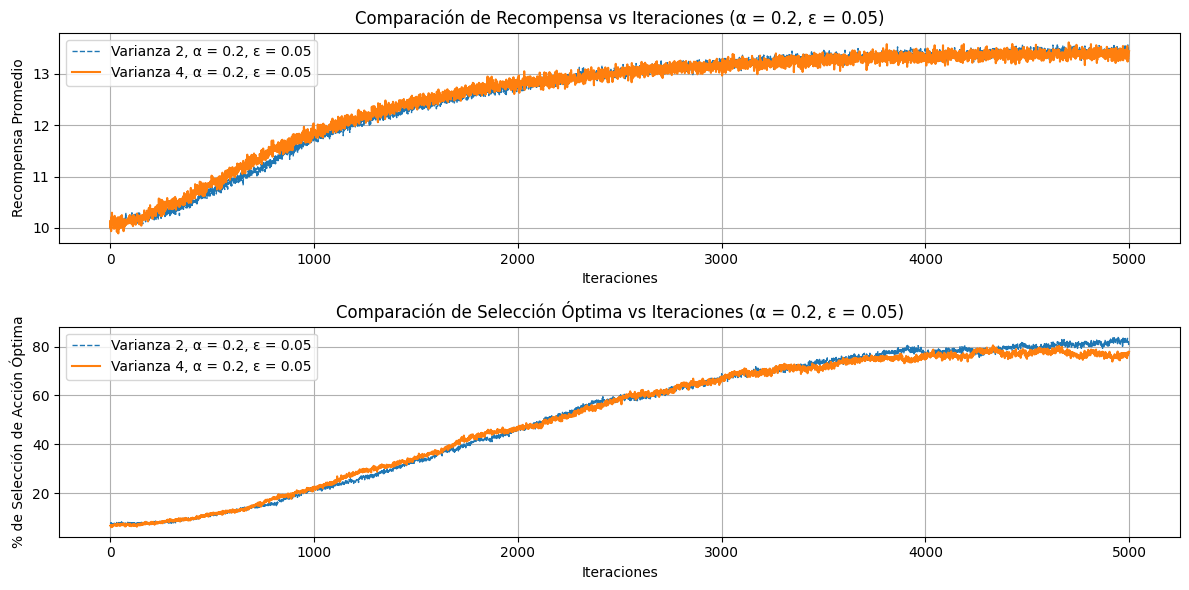

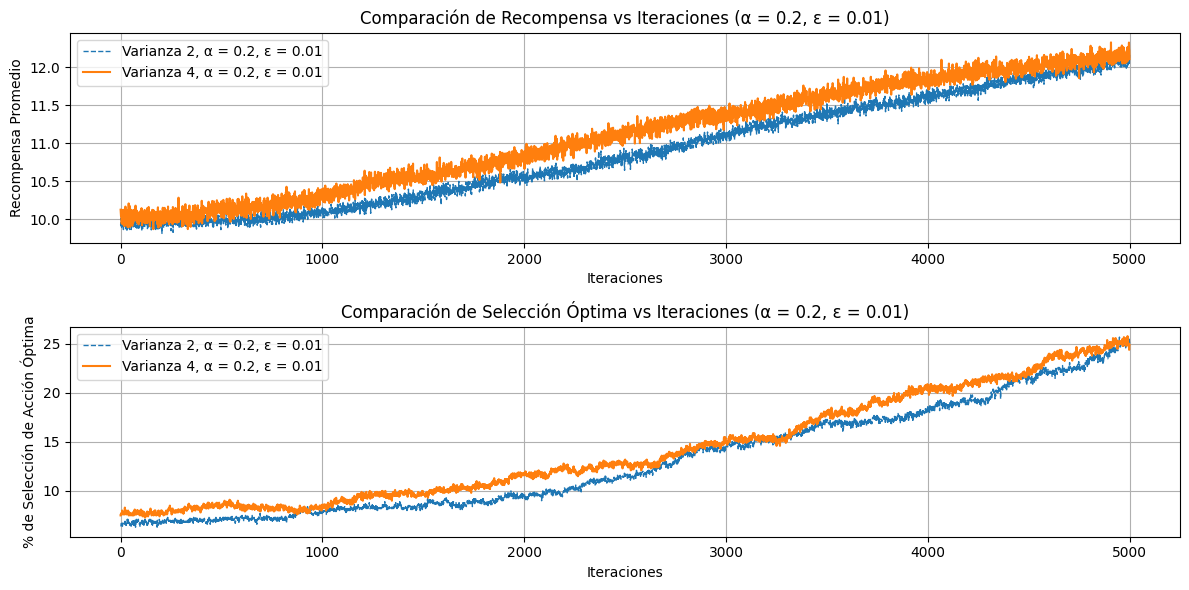

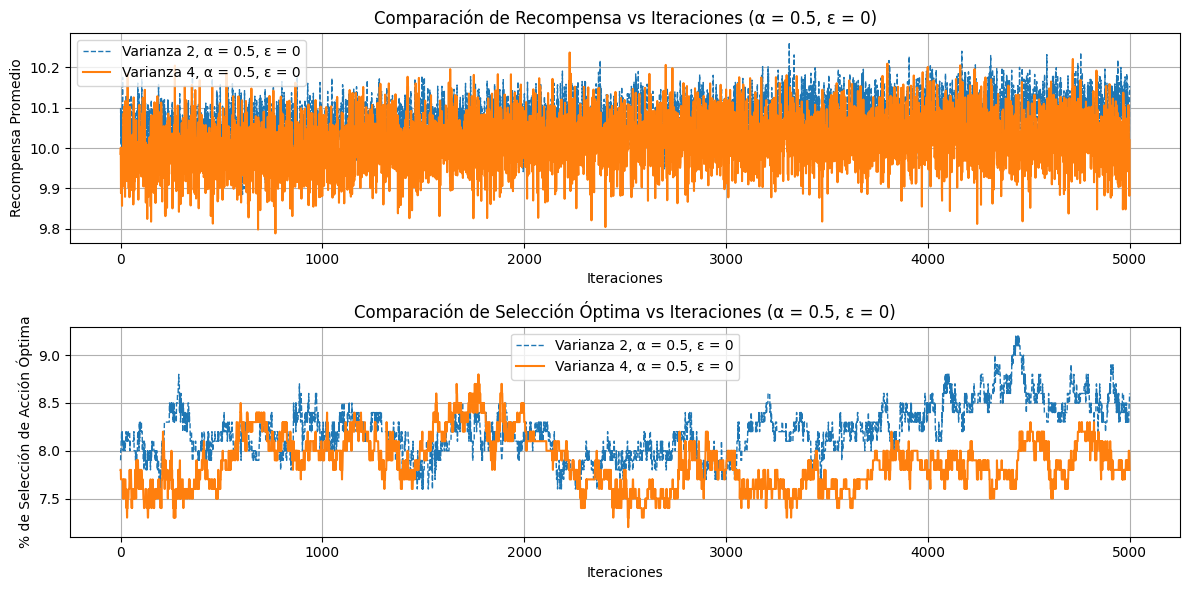

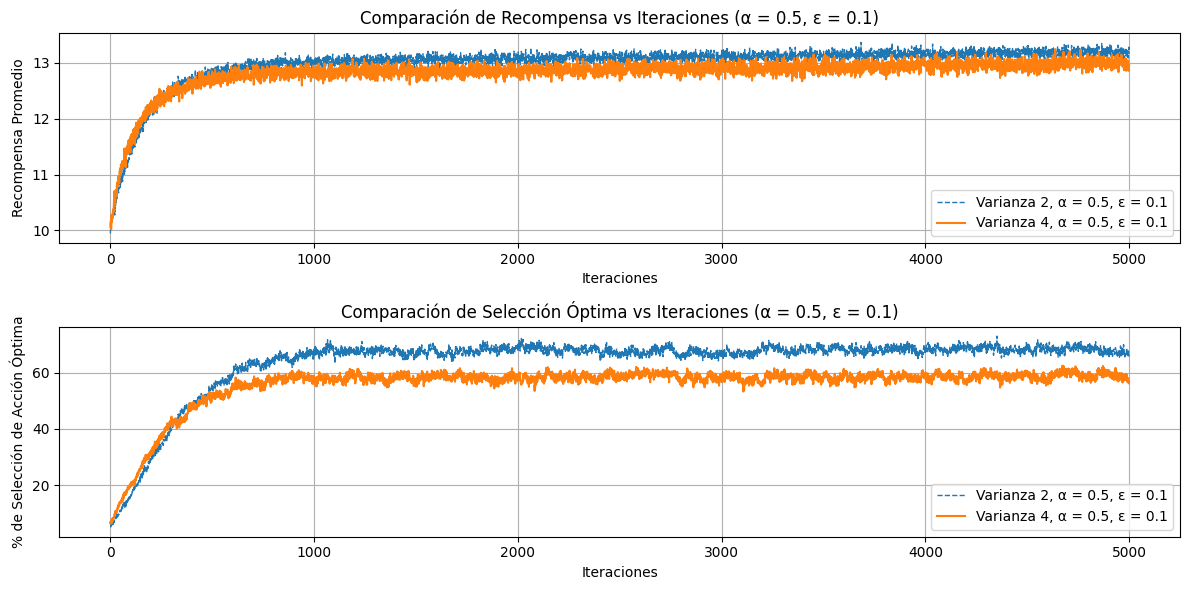

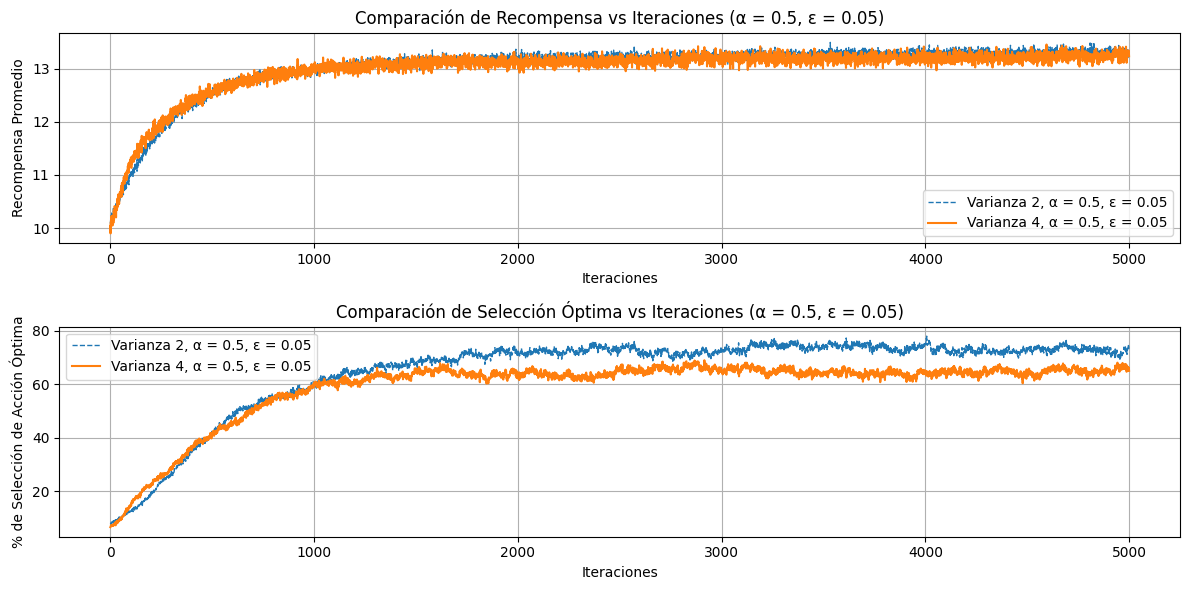

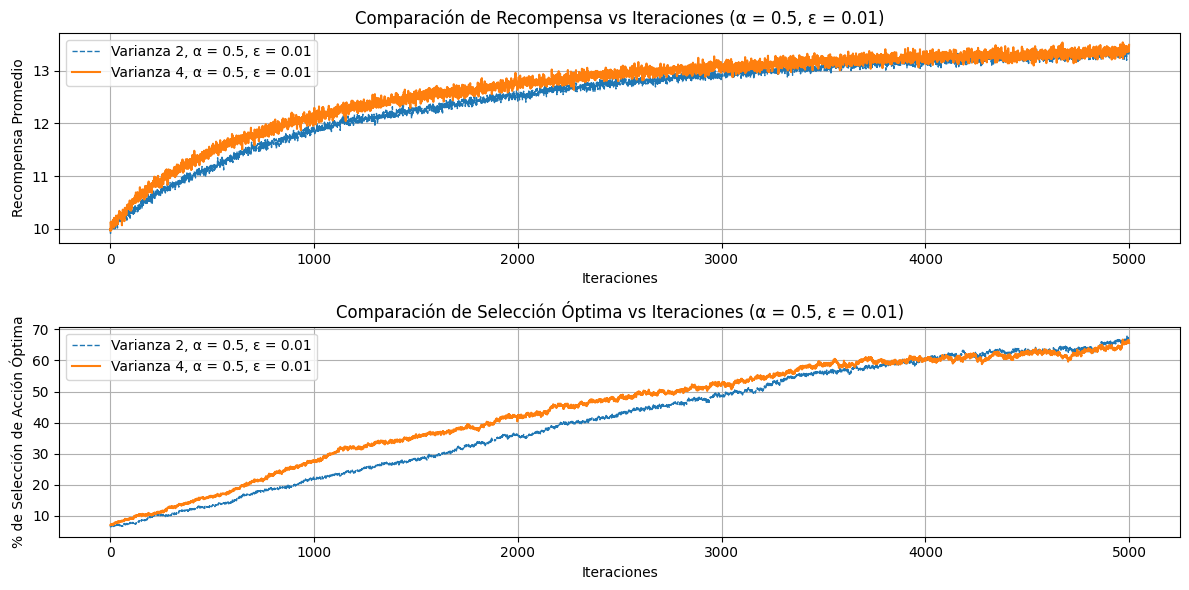

In [22]:
for (alpha, epsilon) in resultados.keys():
    plt.figure(figsize=(12, 6))
    
    # Subgráfica 1: Comparación de recompensa promedio
    plt.subplot(2, 1, 1)
    plt.plot(resultados[(alpha, epsilon)][0], '--', label=f'Varianza 2, α = {alpha}, ε = {epsilon}', linewidth=1)
    plt.plot(resultados2[(alpha, epsilon)][0], label=f'Varianza 4, α = {alpha}, ε = {epsilon}', linewidth=1.5)
    plt.xlabel('Iteraciones')
    plt.ylabel('Recompensa Promedio')
    plt.title(f'Comparación de Recompensa vs Iteraciones (α = {alpha}, ε = {epsilon})')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Subgráfica 2: Comparación de selección óptima
    plt.subplot(2, 1, 2)
    plt.plot(resultados[(alpha, epsilon)][1] * 100, '--', label=f'Varianza 2, α = {alpha}, ε = {epsilon}', linewidth=1)
    plt.plot(resultados2[(alpha, epsilon)][1] * 100, label=f'Varianza 4, α = {alpha}, ε = {epsilon}', linewidth=1.5)
    plt.xlabel('Iteraciones')
    plt.ylabel('% de Selección de Acción Óptima')
    plt.title(f'Comparación de Selección Óptima vs Iteraciones (α = {alpha}, ε = {epsilon})')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Para evidenciar los resultados de forma tabular, se implementa:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def preparar_datos_tabulares(resultados, resultados2):
    data = []
    for (alpha, epsilon), (recompensas, optimos) in resultados.items():
        recompensas2, optimos2 = resultados2[(alpha, epsilon)]
        for iteracion, (r1, r2, o1, o2) in enumerate(zip(recompensas, recompensas2, optimos, optimos2)):
            data.append({
                'Alpha': alpha,
                'Epsilon': epsilon,
                'Iteracion': iteracion,
                'Recompensa_Varianza_2': r1,
                'Recompensa_Varianza_4': r2,
                '%Optima_Varianza_2': o1 * 100,
                '%Optima_Varianza_4': o2 * 100
            })
    return pd.DataFrame(data)

# Preparar los datos tabulares
df_resultados = preparar_datos_tabulares(resultados, resultados2)

# Mostrar una vista tabular de los primeros datos
print(df_resultados.head())

   Alpha  Epsilon  Iteracion  Recompensa_Varianza_2  Recompensa_Varianza_4  \
0    0.1      0.0          0               9.946425               9.937630   
1    0.1      0.0          1               9.871042              10.056968   
2    0.1      0.0          2               9.969590              10.005111   
3    0.1      0.0          3               9.930332               9.964267   
4    0.1      0.0          4               9.941728               9.901777   

   %Optima_Varianza_2  %Optima_Varianza_4  
0                 6.7                 5.3  
1                 6.6                 5.3  
2                 6.7                 5.3  
3                 7.0                 5.3  
4                 6.8                 5.3  


Se realiza el contraste de resultados entre la varianza de acción contemplada del punto 1 y 2 con el algoritmo ϵ-greedy

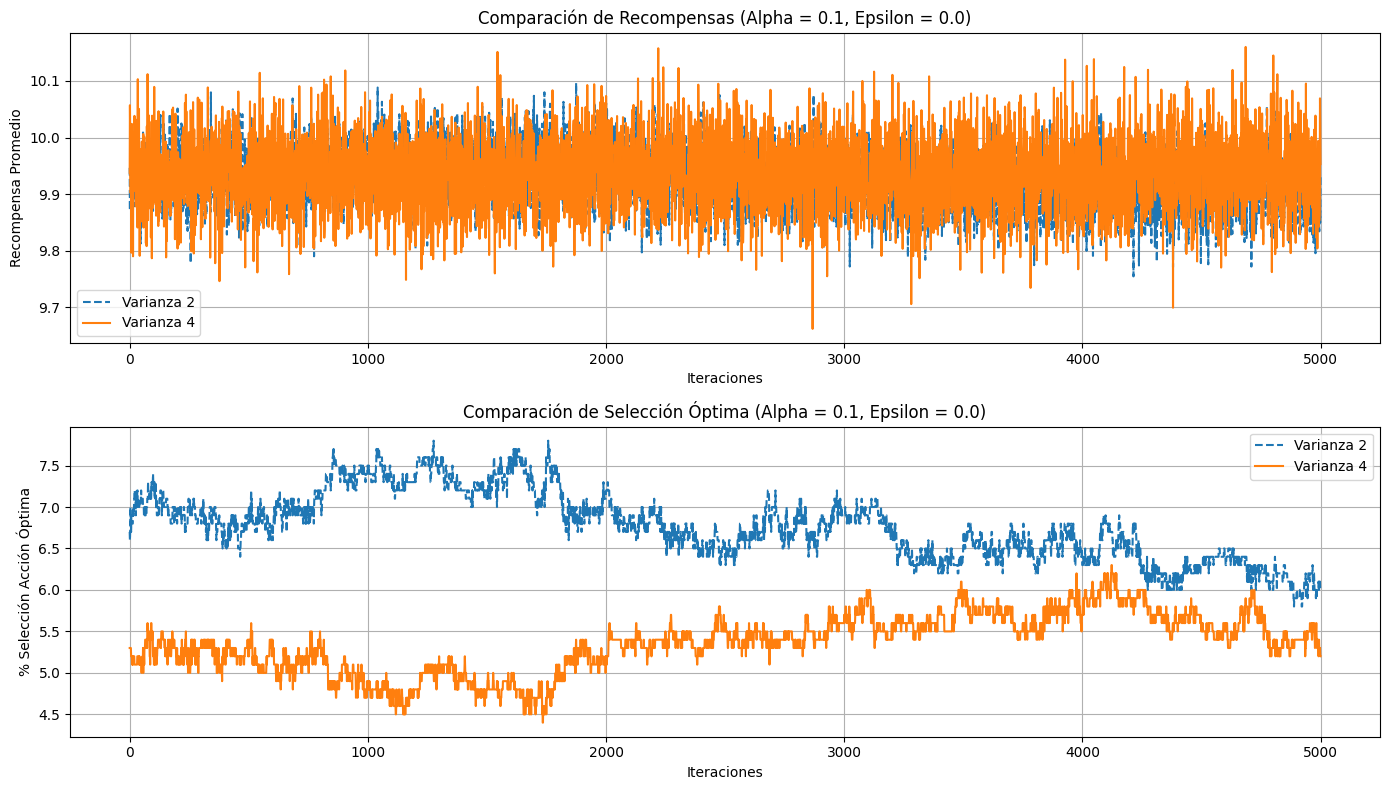

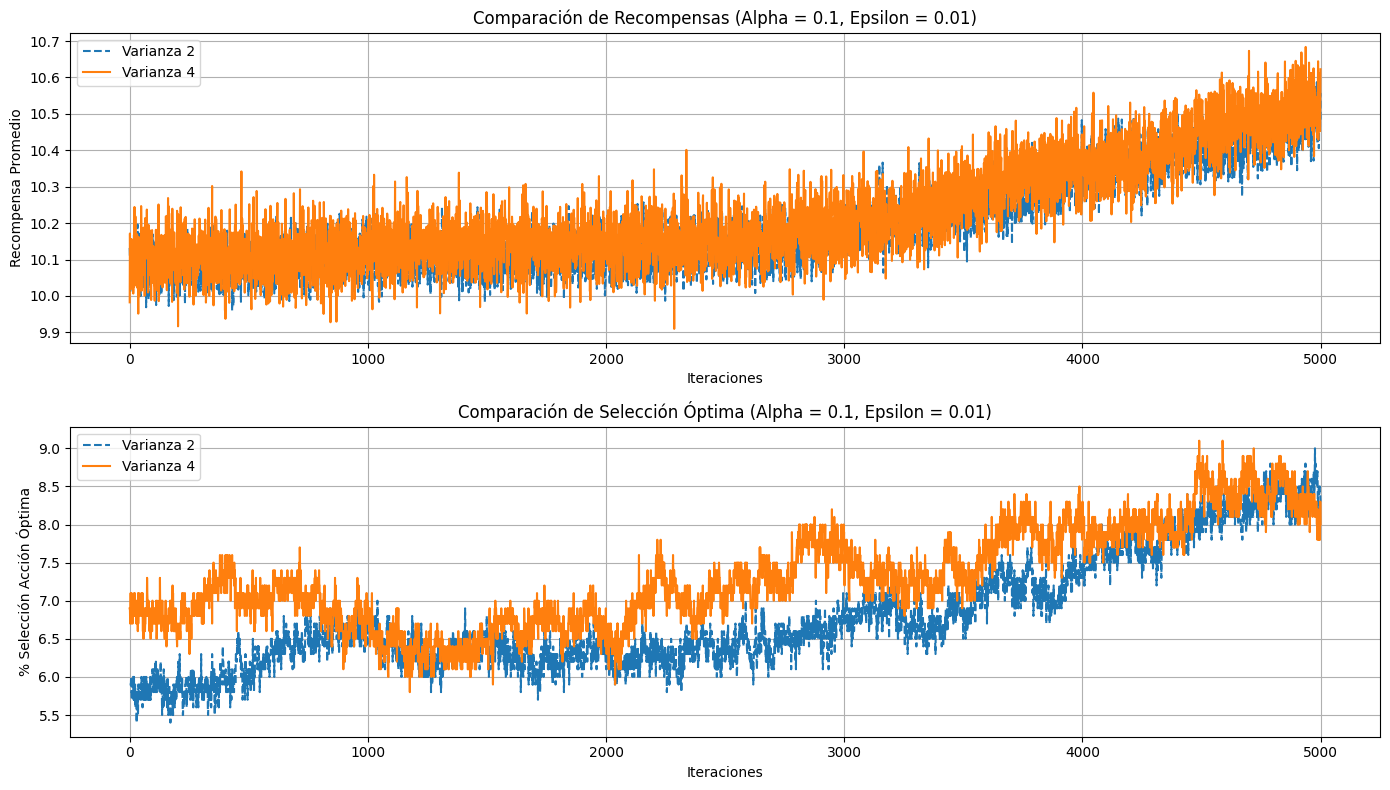

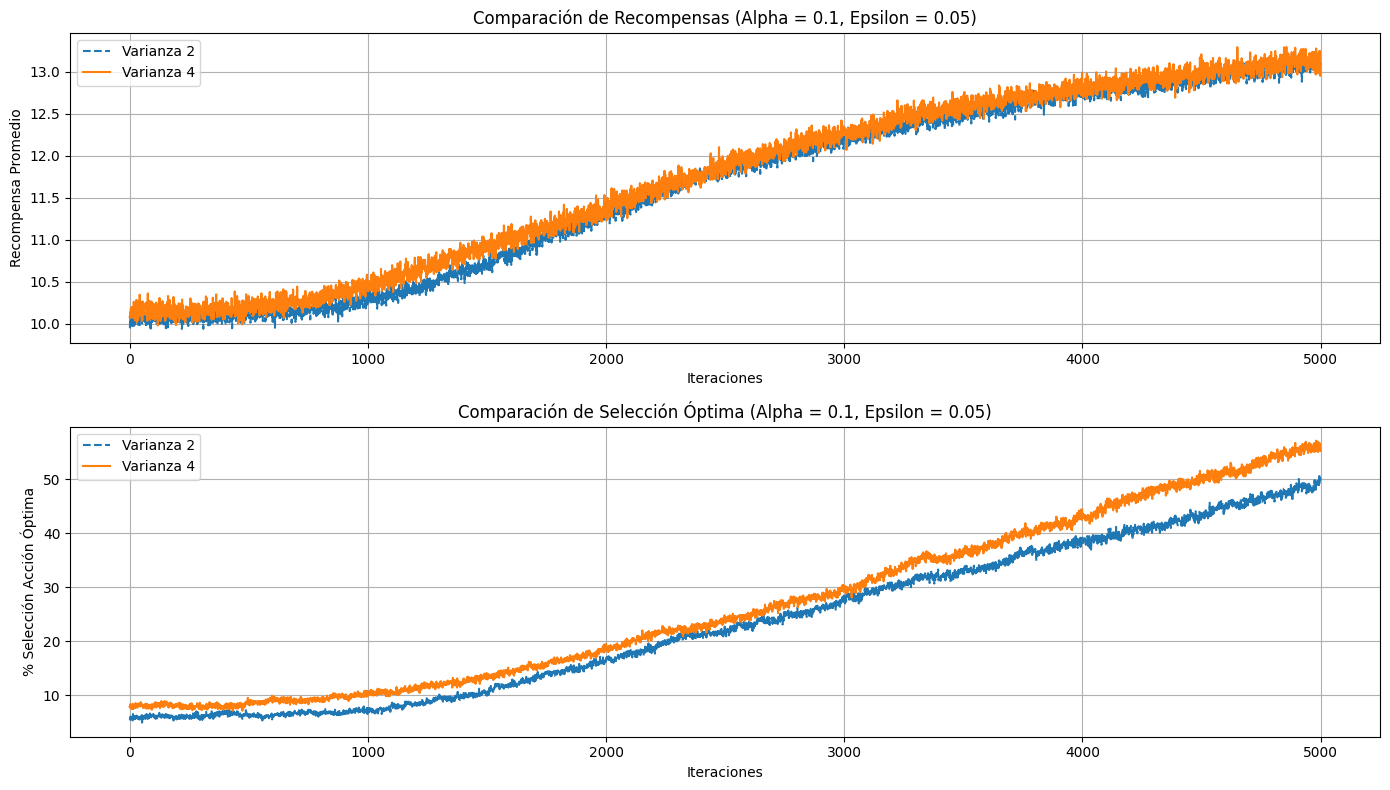

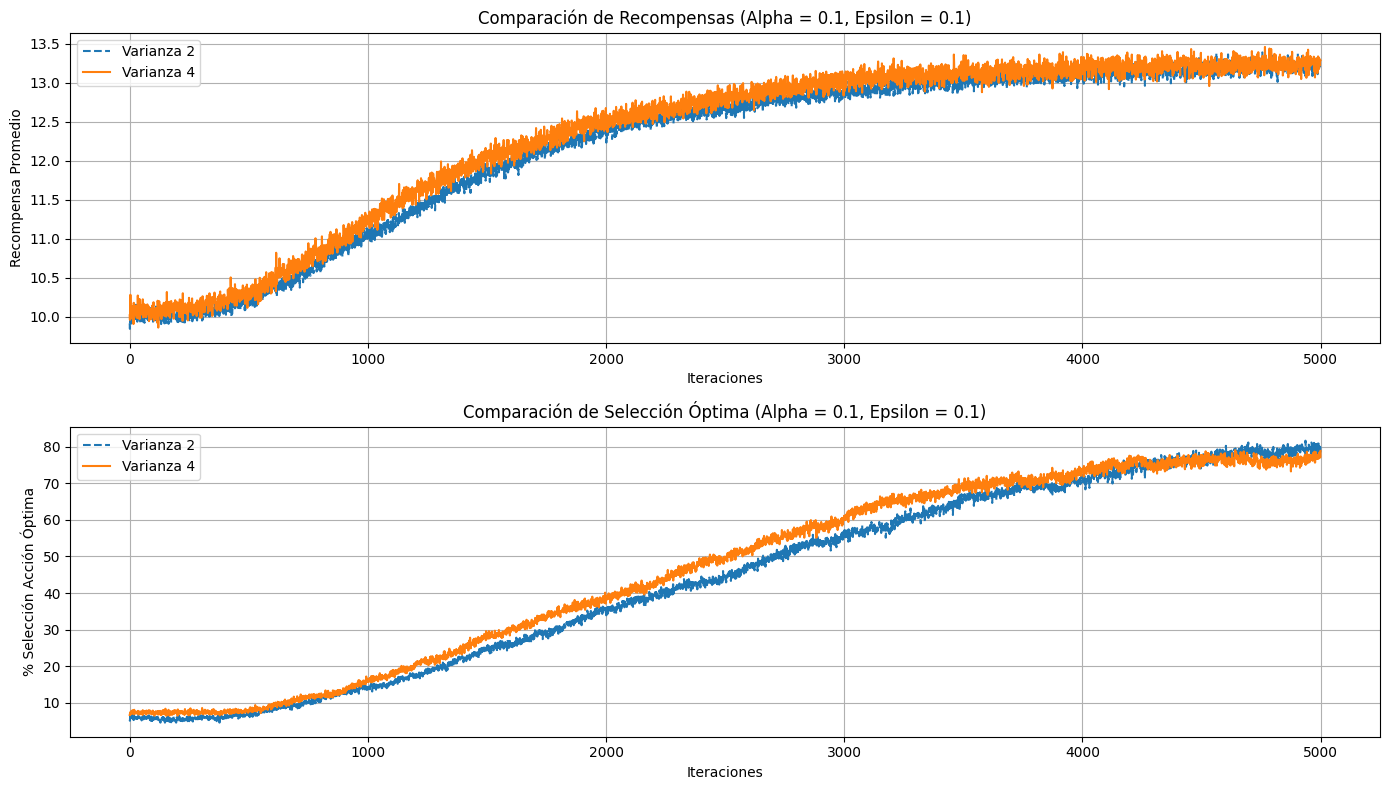

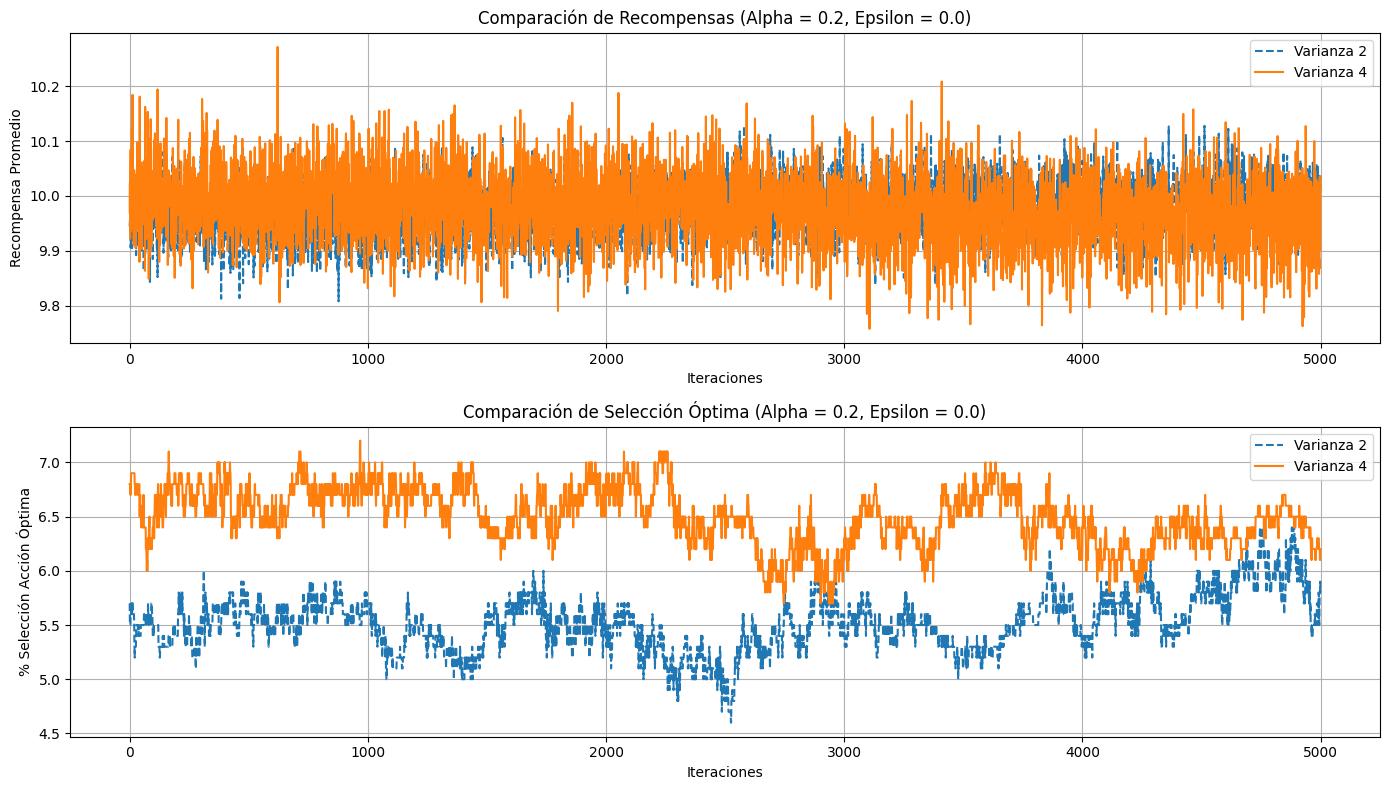

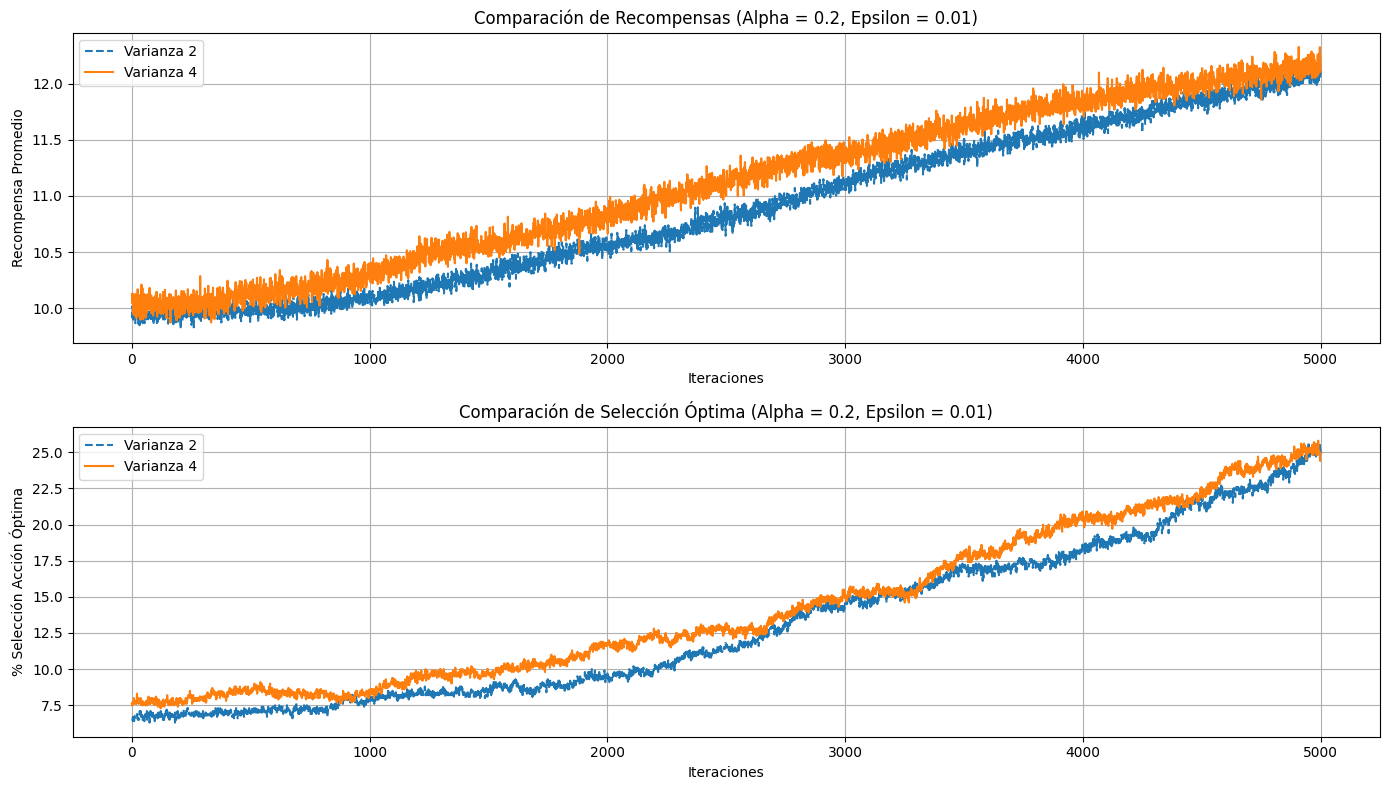

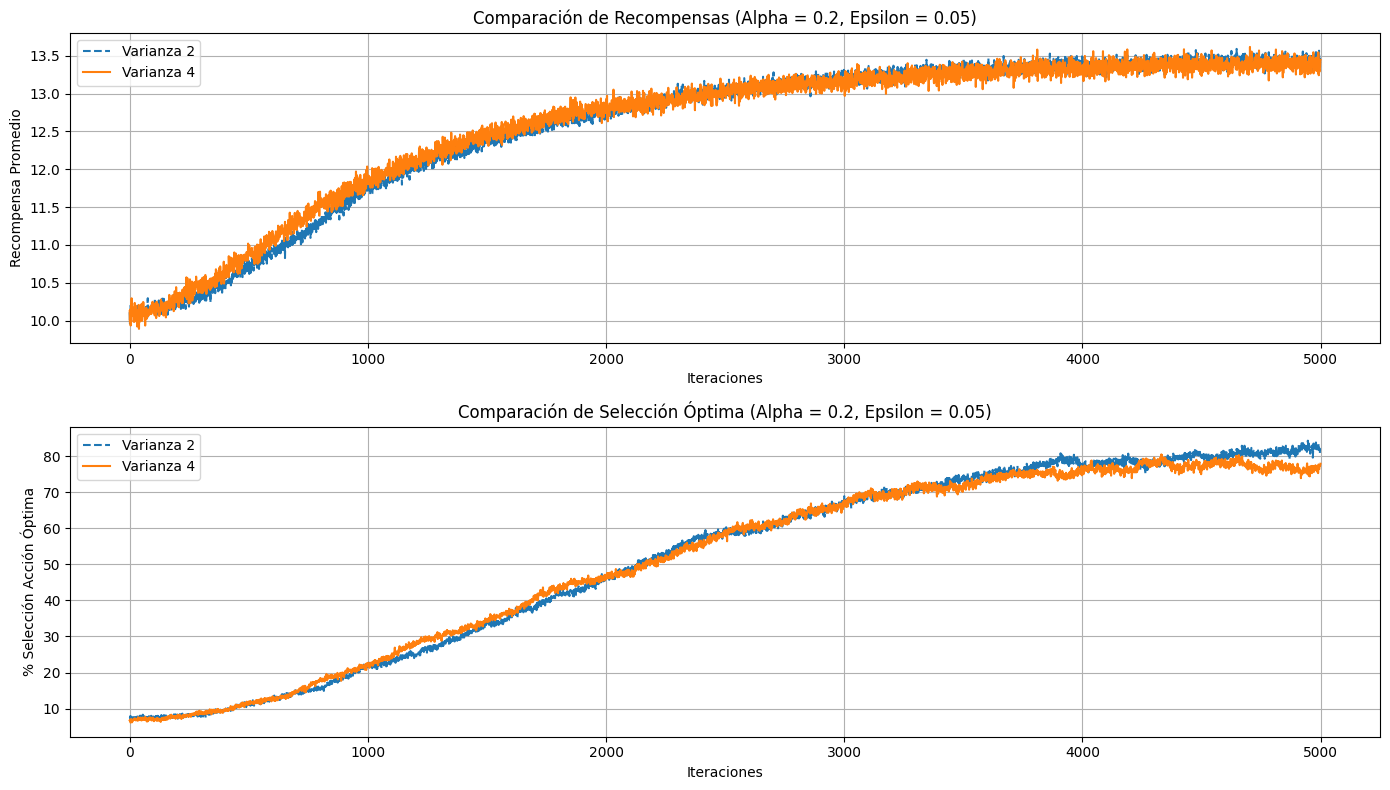

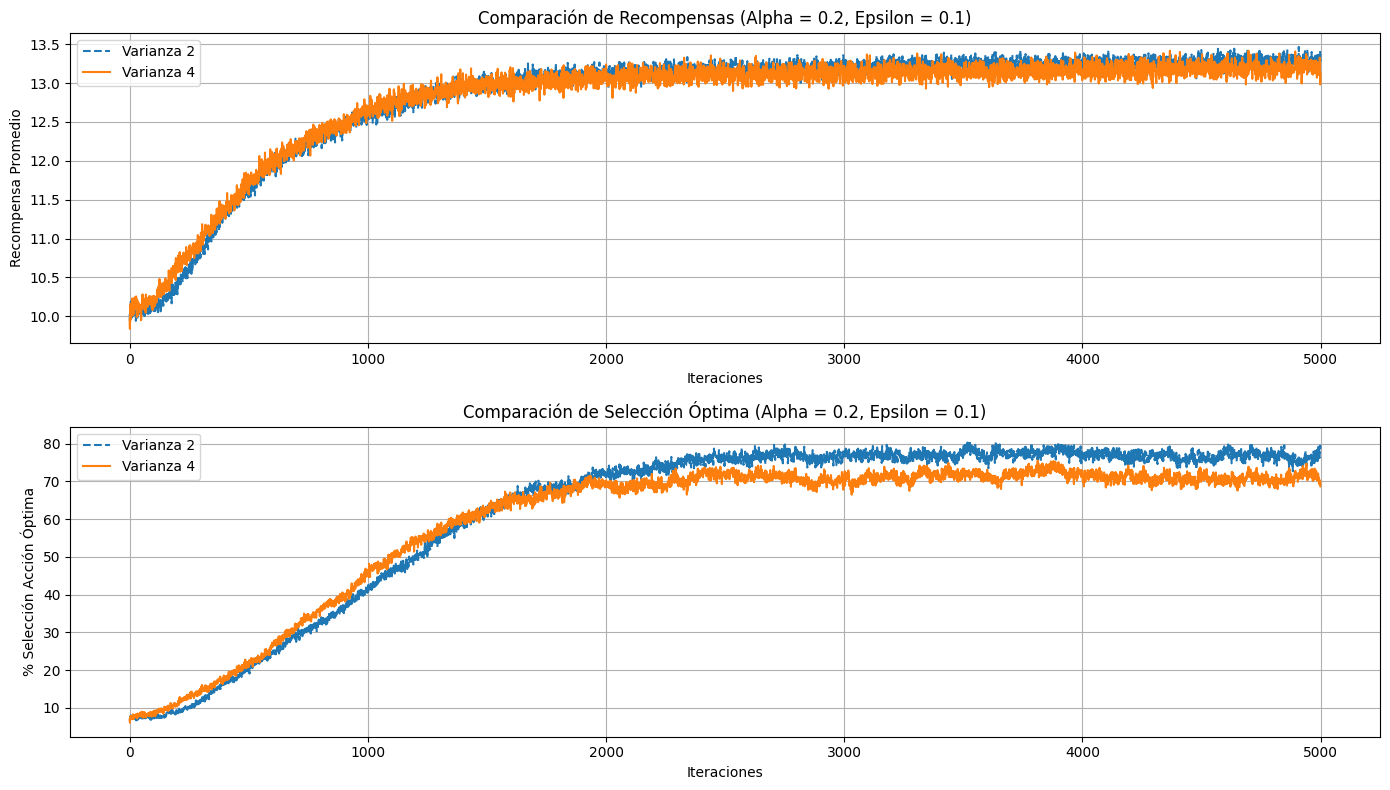

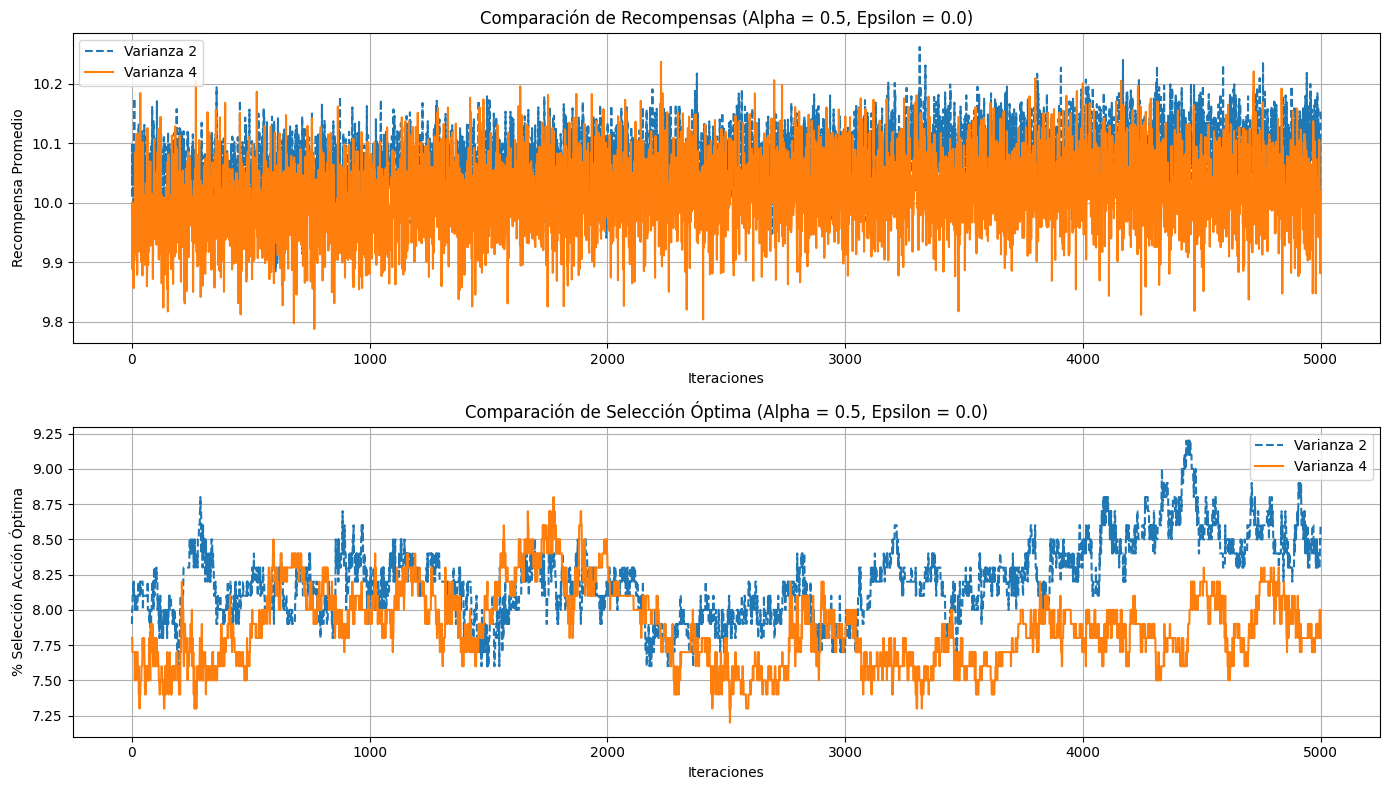

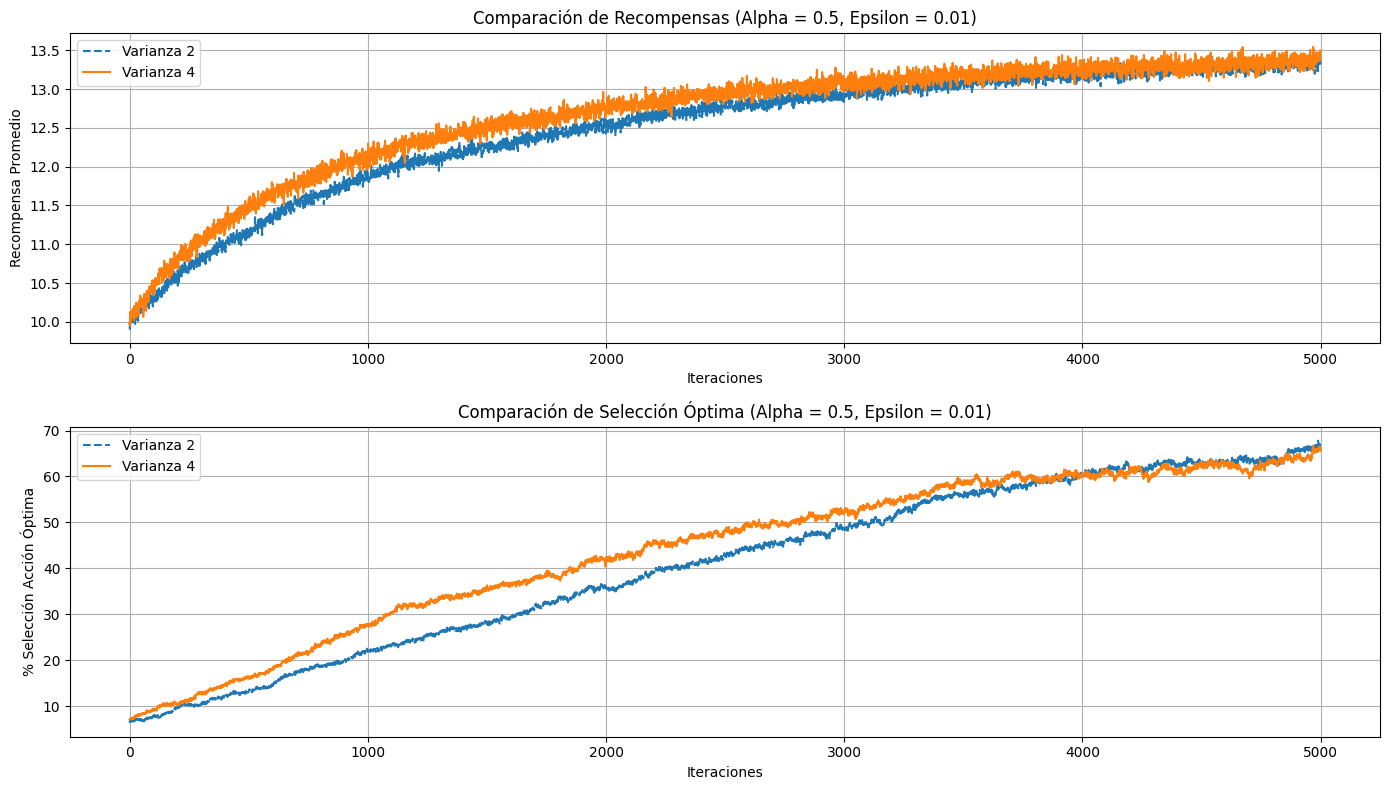

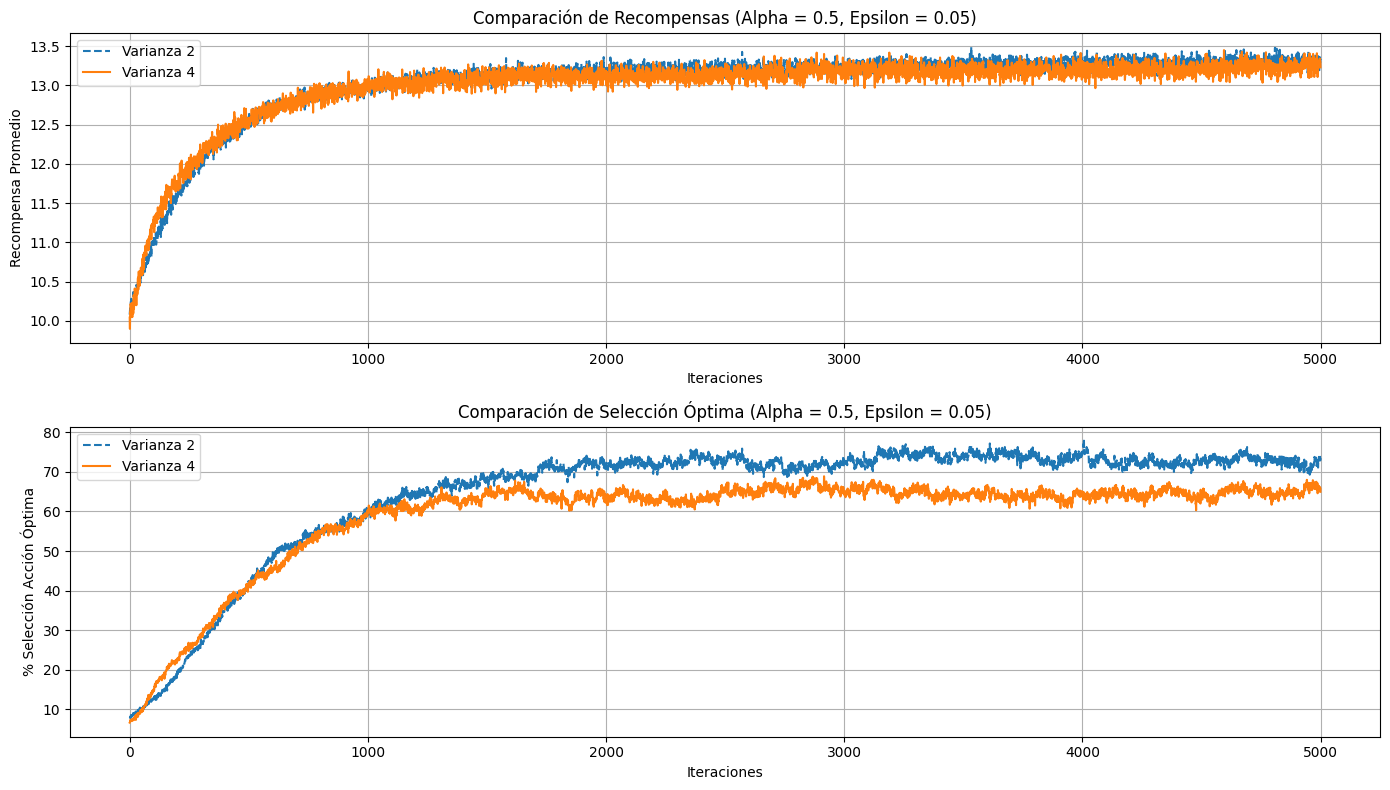

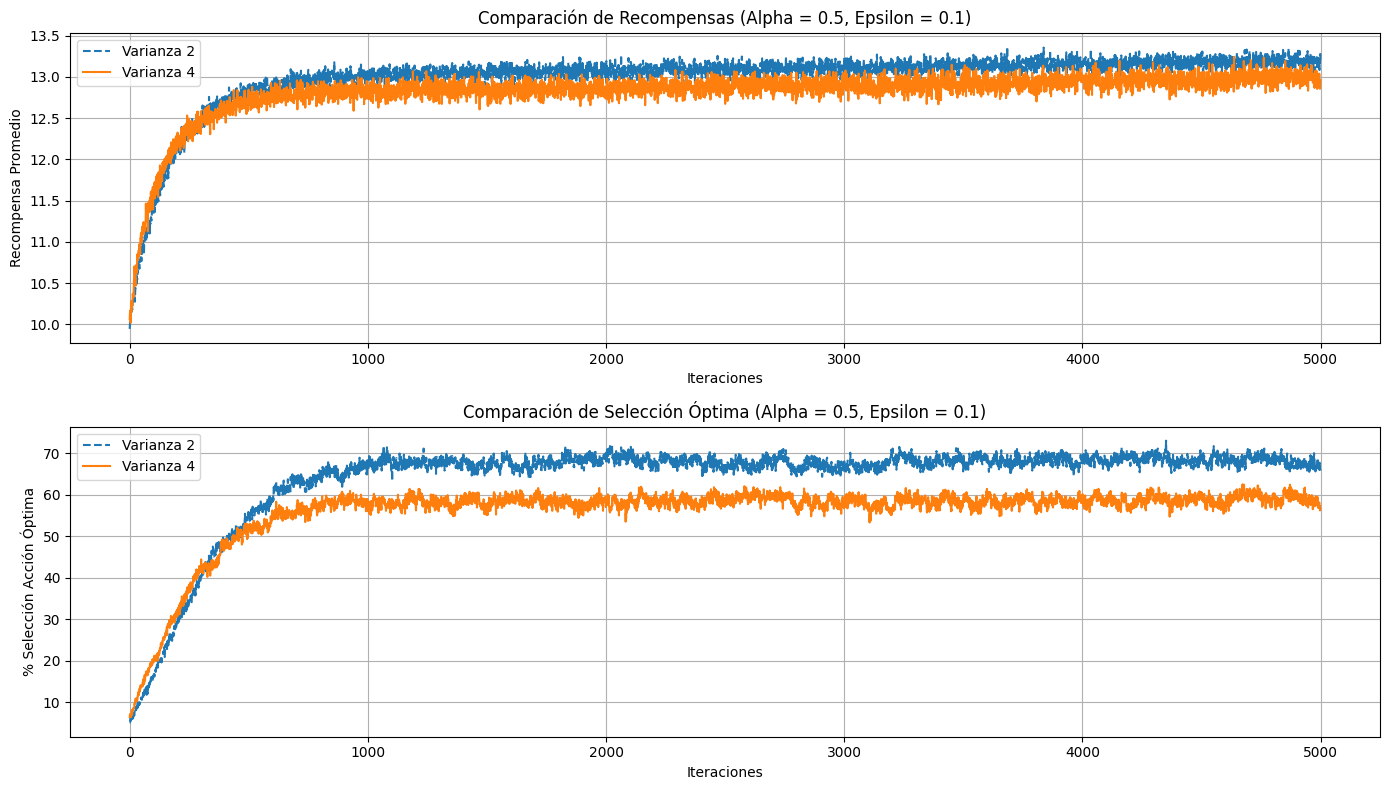

In [25]:
def graficar_contraste_tabular(df):
    # Agrupamos por Alpha y Epsilon para graficar
    agrupados = df.groupby(['Alpha', 'Epsilon'])
    
    for (alpha, epsilon), grupo in agrupados:
        plt.figure(figsize=(14, 8))
        
        # Subgráfica 1: Recompensas
        plt.subplot(2, 1, 1)
        plt.plot(grupo['Iteracion'], grupo['Recompensa_Varianza_2'], label='Varianza 2', linestyle='--', linewidth=1.5)
        plt.plot(grupo['Iteracion'], grupo['Recompensa_Varianza_4'], label='Varianza 4', linestyle='-', linewidth=1.5)
        plt.xlabel('Iteraciones')
        plt.ylabel('Recompensa Promedio')
        plt.title(f'Comparación de Recompensas (Alpha = {alpha}, Epsilon = {epsilon})')
        plt.legend()
        plt.grid(True)
        
        # Subgráfica 2: Selección de acción óptima
        plt.subplot(2, 1, 2)
        plt.plot(grupo['Iteracion'], grupo['%Optima_Varianza_2'], label='Varianza 2', linestyle='--', linewidth=1.5)
        plt.plot(grupo['Iteracion'], grupo['%Optima_Varianza_4'], label='Varianza 4', linestyle='-', linewidth=1.5)
        plt.xlabel('Iteraciones')
        plt.ylabel('% Selección Acción Óptima')
        plt.title(f'Comparación de Selección Óptima (Alpha = {alpha}, Epsilon = {epsilon})')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Generar gráficos de contraste
graficar_contraste_tabular(df_resultados)

### Implementación - Gradient Bandit

In [26]:
varianza_recompensa = 2  # Varianza de las recompensas con varianza 4

Se ejecutan los experimentos para cada valor de epsilon y almacenar resultados

In [28]:
resultados_gradient2 = obtener_resultados_gradient_bandit(alphasBandits)

Se realizán las graficas del testbed para contrastar los resultados de recompensa promedio y selección de acción optima durante las iteraciones

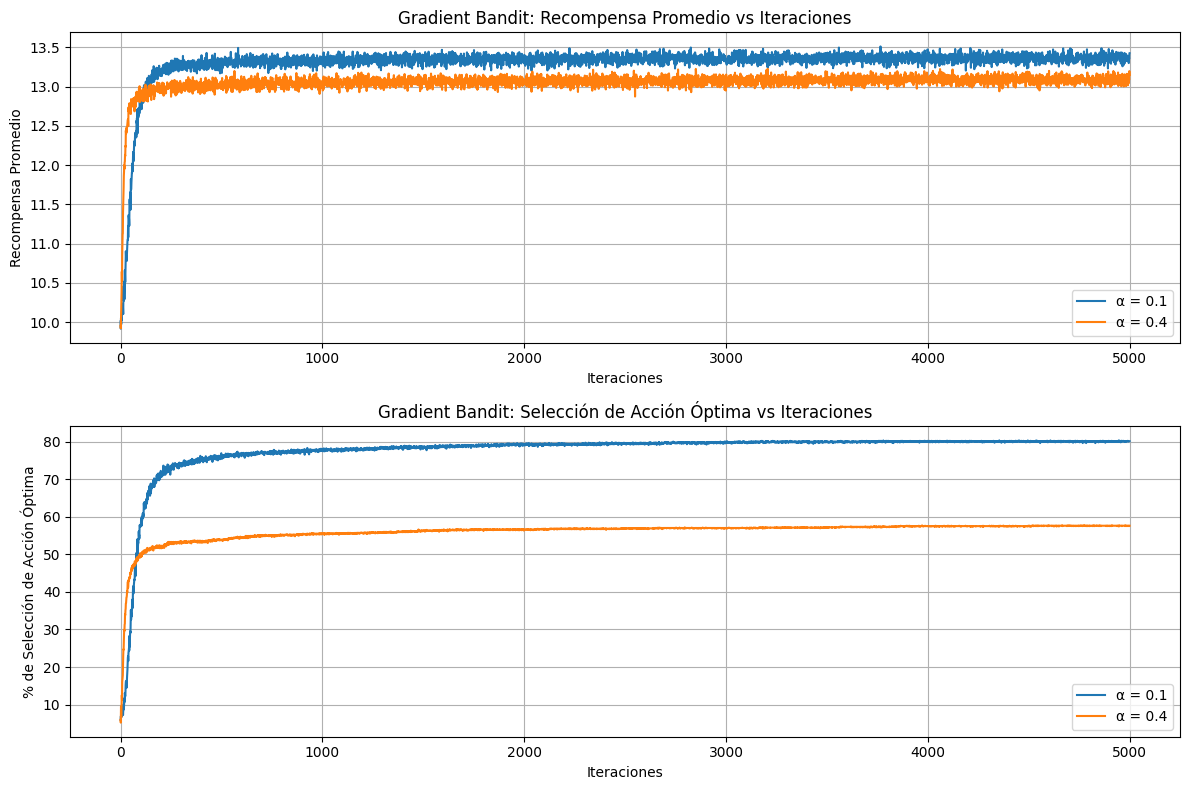

In [29]:
plt.figure(figsize=(12, 8))

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for alpha, (recompensa, _) in resultados_gradient.items():
    plt.plot(recompensa, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Gradient Bandit: Recompensa Promedio vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for alpha, (_, porcentaje_optimo) in resultados_gradient.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Gradient Bandit: Selección de Acción Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

Ahorá, realizamos la comparación para el algoritmo de gradient bandit con los resultados del punto 1 y 2

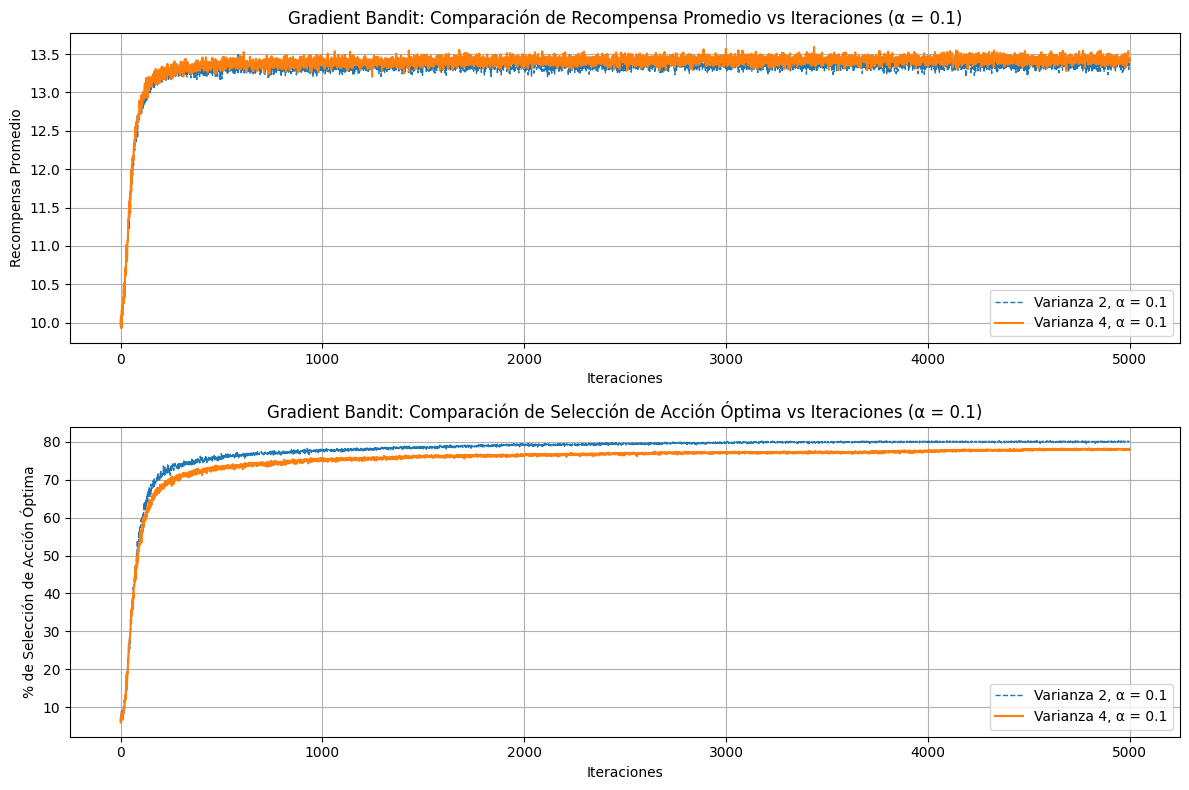

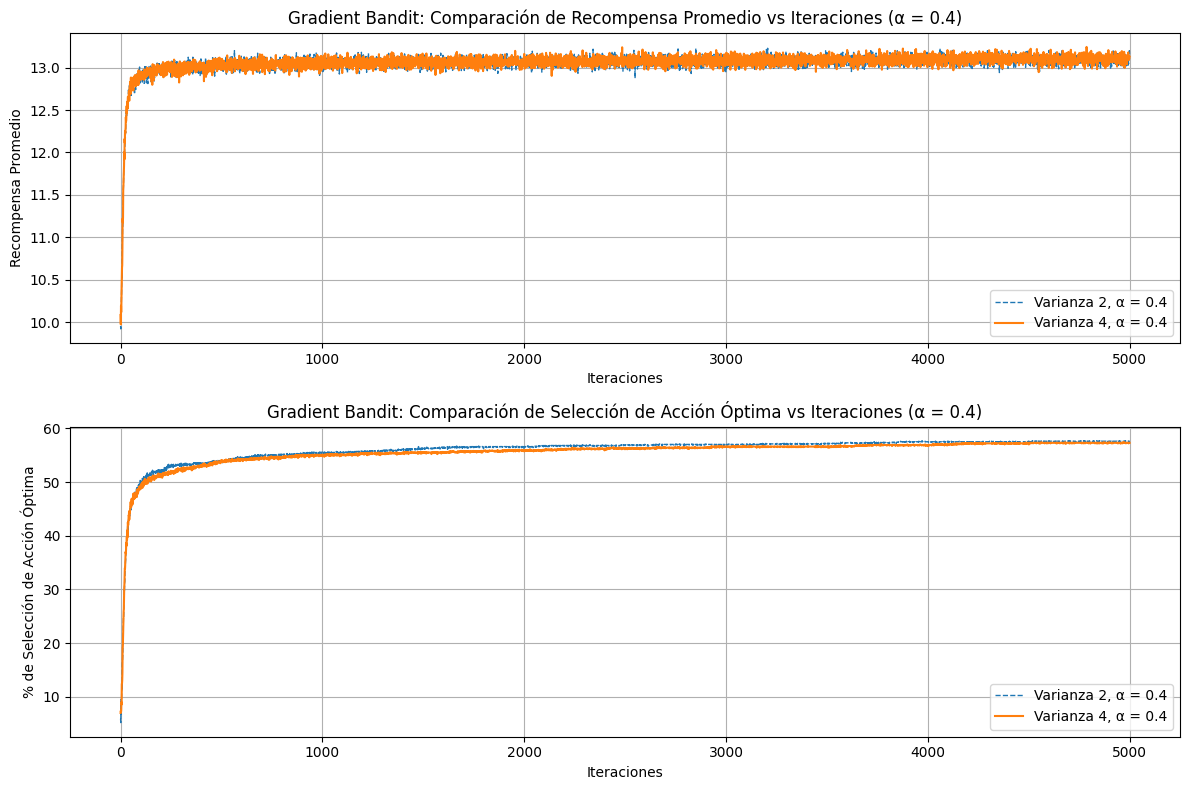

In [30]:
def comparar_resultados_gradient_bandit(resultados1, resultados2, alphas):
    for alpha in alphas:
        plt.figure(figsize=(12, 8))
        
        # Subgráfica 1: Comparación de recompensas promedio
        plt.subplot(2, 1, 1)
        plt.plot(resultados1[alpha][0], '--', label=f'Varianza 2, α = {alpha}', linewidth=1)
        plt.plot(resultados2[alpha][0], label=f'Varianza 4, α = {alpha}', linewidth=1.5)
        plt.xlabel('Iteraciones')
        plt.ylabel('Recompensa Promedio')
        plt.title(f'Gradient Bandit: Comparación de Recompensa Promedio vs Iteraciones (α = {alpha})')
        plt.legend(loc='best')
        plt.grid(True)

        # Subgráfica 2: Comparación del porcentaje de acción óptima seleccionada
        plt.subplot(2, 1, 2)
        plt.plot(resultados1[alpha][1] * 100, '--', label=f'Varianza 2, α = {alpha}', linewidth=1)
        plt.plot(resultados2[alpha][1] * 100, label=f'Varianza 4, α = {alpha}', linewidth=1.5)
        plt.xlabel('Iteraciones')
        plt.ylabel('% de Selección de Acción Óptima')
        plt.title(f'Gradient Bandit: Comparación de Selección de Acción Óptima vs Iteraciones (α = {alpha})')
        plt.legend(loc='best')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

comparar_resultados_gradient_bandit(resultados_gradient, resultados_gradient2, alphasBandits)